<a href="https://colab.research.google.com/github/dataqueenpend/Projects-/blob/main/Data_Analysis_of_the_KPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Preparing the data for the Analysis. 
* Importing libraries. 
* Reading csv file.
* Cleaning, transforming, correcting. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/csv recrttask.csv',delimiter=';', names=['ntiD', 'AHT US', 'AHT EU', 'Quality', 'Number of cases'] )

In [ ]:
data.head()

,ntiD,AHT US,AHT EU,Quality,Number of cases
0,1,"416,7","554,4","95,6%",503
1,2,"613,5","474,8","99,0%",260
2,3,"430,7","324,3","100,0%",385
3,4,"579,0","594,8","93,8%",412
4,5,"403,9","222,2","78,9%",1089


In [ ]:
data.set_index('ntiD')

,AHT US,AHT EU,Quality,Number of cases
ntiD,,,,
1,"416,7","554,4","95,6%",503
2,"613,5","474,8","99,0%",260
3,"430,7","324,3","100,0%",385
4,"579,0","594,8","93,8%",412
5,"403,9","222,2","78,9%",1089
6,"406,5","692,2","90,6%",894
7,"364,4","158,1","51,4%",233
8,"388,4","300,0","84,7%",1170
9,"617,9","234,4","92,3%",510


In [ ]:
data.dtypes

ntiD                int64
AHT US             object
AHT EU             object
Quality            object
Number of cases     int64
dtype: object

In [ ]:
data[['AHT US', 'AHT EU', 'Quality']] = data[['AHT US', 'AHT EU', 'Quality']].apply(lambda x: x.str.replace(',','.'))

In [ ]:
data['Quality'] = data['Quality'].apply(lambda x: x.replace('%', ''))

In [ ]:
data[['AHT US', 'AHT EU', 'Quality']] = data[['AHT US', 'AHT EU', 'Quality']].apply(pd.to_numeric)

In [ ]:
data.dtypes

ntiD                 int64
AHT US             float64
AHT EU             float64
Quality            float64
Number of cases      int64
dtype: object

Data is prepared for the analysis. 
Datatypes converted to numeric. 

---
Calculating mean values for average team results. 

In [ ]:
#Calculating mean values
aht_us_avg = np.mean(data['AHT US'])
aht_eu_avg = np.mean(data['AHT EU'])
quality_avg = np.mean(data['Quality'])
num_cases_avg = np.mean(data['Number of cases'])

##Data Analysis of the TEAM RESULTS on EU and US markets








####Data description
We'll be analysing small dataset (13 entries) of the team results. Our dataframe consists 4 columns with information about: 
* AHT US - each entry stores a value of the teammate AHT score on the US queue
* AHT EU - each entry stores a value of the teammate AHT score on the EU queue
* Quality - each entry stores a values of the teammate Quality score on both queues
* Number of cases - each entry stores a values of the teammate total worked number of cases on both queues.


###Agenda for the data analysis

1. AHT Analysis 
2. Quality Analysis
3. Number of cases analysis
4. Correlations between the features
5. Identifying teammates with the greatest impact on the AHT values
6. Identifying teammates who need to work intesively on the Quality goal - 95%
7. Identifying which KPI's should be work on first
8. Identying which behaviors can cause low AHT levels
9. How to improve whole team results?

##AHT Analysis

We'll check out on the EU and US market:
* average AHT score for the whole team,
* lowest and highest AHT scores of the individual team members, 
* average AHT in comparison with individual team members results, 
* 5 highest and lowest AHT in comparison to the average AHT. 

---
First let's calculate the average results.

In [ ]:
print('Average US AHT for the whole team: {}'.format(aht_us_avg))

Average US AHT for the whole team: 449.276923076923


In [ ]:
print('Average EU AHT for the whole team: {}'.format(aht_eu_avg))

Average EU AHT for the whole team: 385.0384615384615


In [ ]:
aht_cols = ['AHT EU', 'AHT US']
for col in data[aht_cols]:
  print('Lowest '+ col + ': {aht}, ntiD - {id}'.format(aht=np.min(data[col]), id=int(data[col].idxmin())+1))
  print('Highest ' + col + ': {} , ntiD - {}'.format(np.max(data[col]), int(data[col].idxmax())+1))

Lowest AHT EU: 158.1, ntiD - 7
Highest AHT EU: 692.2 , ntiD - 6
Lowest AHT US: 283.9, ntiD - 11
Highest AHT US: 617.9 , ntiD - 9


> **Lowest AHT on EU** queue has a person with **ntiD 7.**

> **Lowest AHT on US** queue has a person with **ntiD 11.**


> **Highest AHT on EU** queue has a person with **ntiD 6.**

> **Highest AHT on US** queue has a person with **ntiD 9.**

---
Let's take a look how individuals team results presents in respect to the average value on each market. 

####Individual AHT resulst on the EU market in respect to the average AHT of the whole team

Text(0, 0.5, 'AHT')

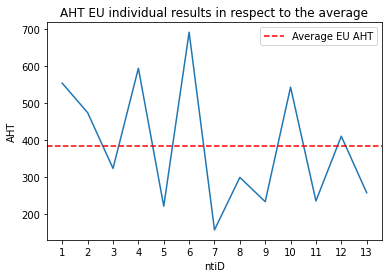

In [ ]:
sns.lineplot(data=data, y='AHT EU', x='ntiD')
plt.title('AHT EU individual results in respect to the average')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
b= 385
plt.axhline(y=b, linestyle='--', c='red', label='Average EU AHT')
plt.legend()
plt.ylabel('AHT')

####Individual AHT resulst on the US market in respect to the average AHT of the whole team

Text(0, 0.5, 'AHT')

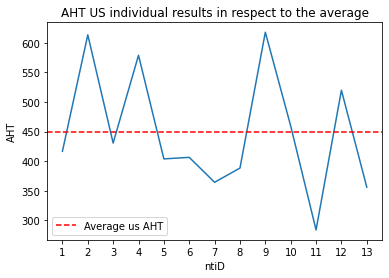

In [ ]:
sns.lineplot(data=data, y='AHT US', x='ntiD')
plt.title('AHT US individual results in respect to the average')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
b= 449
plt.axhline(y=b, linestyle='--', c='red', label='Average us AHT')
plt.legend()
plt.ylabel('AHT')



---

---

###5 lowest and highest AHT

####TOP 5 AHT on EU market with ntid

In [ ]:
top5_eu = data[['AHT EU', 'ntiD']].nsmallest(5, columns='AHT EU')
data[['AHT EU', 'ntiD']].nsmallest(5, columns='AHT EU')

,AHT EU,ntiD
6,158.1,7
4,222.2,5
8,234.4,9
10,236.4,11
12,258.7,13


Text(0, 0.5, 'AHT')

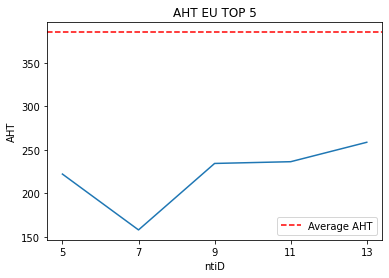

In [ ]:
sns.lineplot(data=top5_eu, x = 'ntiD', y = 'AHT EU')
plt.title('AHT EU TOP 5')
plt.xticks([5,7,9,11,13])
b= 385
plt.axhline(y=b, linestyle='--', c='red', label='Average AHT')
plt.legend()
plt.ylabel('AHT')

####Highest 5 AHT on EU market with ntid

In [ ]:
high_5_aht_eu = data[['AHT EU', 'ntiD']].nlargest(5, columns='AHT EU')
data[['AHT EU', 'ntiD']].nlargest(5, columns='AHT EU')

,AHT EU,ntiD
5,692.2,6
3,594.8,4
0,554.4,1
9,543.9,10
1,474.8,2


Text(0, 0.5, 'AHT')

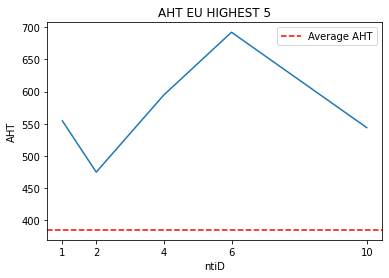

In [ ]:
sns.lineplot(data=high_5_aht_eu, x='ntiD', y='AHT EU')
plt.title('AHT EU HIGHEST 5')
b= 385
plt.axhline(y=b, linestyle='--', c='red', label='Average AHT')
plt.legend()
plt.xticks([1,2,4,6,10])
plt.ylabel('AHT')

> With these above 2 plots we clearly see how large there are differences between the lowest and highest EU AHT scores. 

* Maximum AHT on EU market shows almost 700 sec - in respect to 5 highest AHT between 474 sec and 692 sec.
* Best AHT on EU market is only 158 sec (more or less 6 times smaller than the max AHT in the team) - in respect to 5 smallest AHT between 158 sec and 258 sec. 

Further investigation should lead to comparing these result to the total number of worked cases and the quality. Quality will probably have smaller values in compare with best AHT results. 

---

####TOP 5 AHT on US market with ntid

In [ ]:
top5_us = data[['AHT US', 'ntiD']].nsmallest(5, columns='AHT US')
data[['AHT US', 'ntiD']].nsmallest(5, columns='AHT US')

,AHT US,ntiD
10,283.9,11
12,356.2,13
6,364.4,7
7,388.4,8
4,403.9,5


Text(0, 0.5, 'AHT')

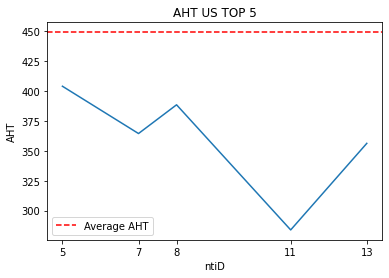

In [ ]:
sns.lineplot(data=top5_us, x='ntiD', y='AHT US')
plt.title('AHT US TOP 5')
a = 449
plt.xticks([5,7,8,11,13])
plt.axhline(y=a, linestyle='--', c='red', label='Average AHT')
plt.legend()
plt.ylabel('AHT')

####Highest 5 AHT on US market with ntid

In [ ]:
high_5_us = data[['AHT US', 'ntiD']].nlargest(5, columns='AHT US')
data[['AHT US', 'ntiD']].nlargest(5, columns='AHT US')

,AHT US,ntiD
8,617.9,9
1,613.5,2
3,579.0,4
11,519.9,12
9,459.6,10


Text(0, 0.5, 'AHT')

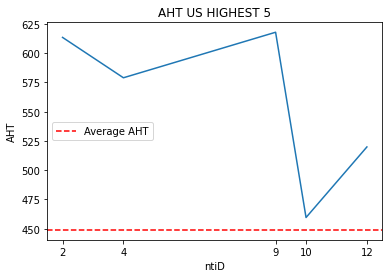

In [ ]:
sns.lineplot(data=high_5_us, x='ntiD', y='AHT US')
plt.title('AHT US HIGHEST 5')
plt.xticks([2, 4, 9, 10, 12])
plt.axhline(y=a, linestyle='--', c='red', label='Average AHT')
plt.legend()
plt.ylabel('AHT')

> Differences between highest and lowest AHT scores on US queue are a little smaller in comparison to the differences in EU queue. 

* Highest AHT on US market is arround 620 sec - in respect to highest 5 values between 460 and 620 sec. 
* Lowest AHT on US market is 283 sec (roughly 2.2 times smaller than the highest AHT) - in respect to the best 5 AHT scores between 283 and 403 sec. 

---
Interestingly EU highest and lowest AHT scores have higher variance than highest and lowest AHT scores on US market. 

While the mean of the UE market AHT is lower -> 385 sec, than the mean value of US market AHT -> 449.  

##Quality Analysis

Let's start with taking a look at our's team average quality score. 

In [ ]:
print('Average quality score of the team: {}'.format(quality_avg))

Average quality score of the team: 85.70769230769231


Quality score of individual team members in respect to the average of the whole team.

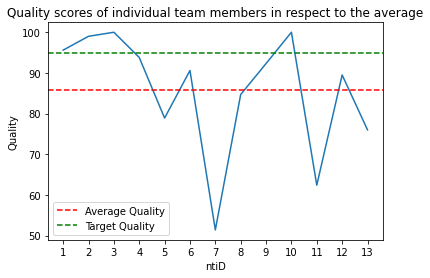

In [ ]:
sns.lineplot(data=data, x='ntiD', y='Quality')
plt.title('Quality scores of individual team members in respect to the average')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
quality_target = 95
plt.axhline(y=quality_avg, linestyle='--', c='red', label='Average Quality')
plt.axhline(y=quality_target, linestyle='--', c='green', label='Target Quality')
plt.legend()

What are the lowest and highest quality score in the team?

In [ ]:
print('Highest quality score in the team is: {}, ntid - {}'.format(np.max(data['Quality']), int(data['Quality'].idxmax())+1))

Highest quality score in the team is: 100.0, ntid - 3


In [ ]:
print('Lowest quality score in the team is {}, ntid - {}'.format(np.min(data['Quality']), int(data['Quality'].idxmin())+1))

Lowest quality score in the team is 51.4, ntid - 7


> With this first look we can see that our teammate with ntid 7 has an amazing speed while doing cases - a lot above the whole team average (EU/AVG: 158/385, US/AVG: 364/449) - but we'll be in need to work with our teammate on the quality aspect. 


In the meanwhile let's take a closer look to the highest and lowest top 5 quality scores. If it will be a correlation between quality and aht?

In [ ]:
high_5_qual = data[['Quality', 'ntiD']].nlargest(5, columns='Quality')
data[['Quality', 'ntiD']].nlargest(5, columns='Quality')

,Quality,ntiD
2,100.0,3
9,100.0,10
1,99.0,2
0,95.6,1
3,93.8,4


It seems that teammates with top quality scores (4 on 5 teammates) are also having the highest AHT on EU market and 3 of 5 of them have the highest AHT on the US market. 





In [ ]:
low_5_qual = data[['Quality', 'ntiD']].nsmallest(5, columns='Quality')
data[['Quality', 'ntiD']].nsmallest(5, columns='Quality')

,Quality,ntiD
6,51.4,7
10,62.4,11
12,76.0,13
4,78.9,5
7,84.7,8


With the lowest quality scores we have the mirror reflection of the situation. With low quality scores, we can observe the lowest AHT values. 

---

Let's see how far from the average of the whole team the lowest and highest 5 quality score are. 

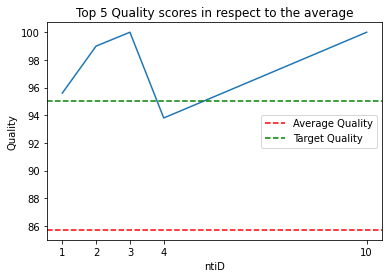

In [ ]:
sns.lineplot(data=high_5_qual, x='ntiD', y='Quality')
plt.title('Top 5 Quality scores in respect to the average')
plt.xticks([1,2,3,4,10])
plt.axhline(y=quality_avg, linestyle='--', c='red', label='Average Quality')
plt.axhline(y=quality_target, linestyle='--', c='green', label='Target Quality')
plt.legend()

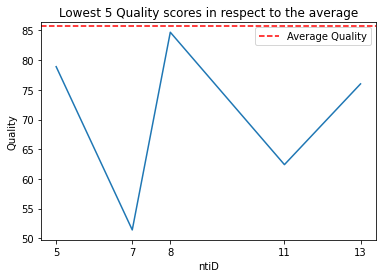

In [ ]:
sns.lineplot(data=low_5_qual, x='ntiD', y='Quality')
plt.title('Lowest 5 Quality scores in respect to the average')
plt.xticks([5,7,8,11,13])
plt.axhline(y=quality_avg, linestyle='--', c='red', label='Average Quality')
plt.legend()

> It looks like 3 of our teammates - ntid 5,8,13 - are really close to the average of the whole team. 

Finally we'll check out the correlation between quality and aht, to prove our earlier hypothesis. 

###Quality vs. AHT 

####Quality vs. AHT on the EU market

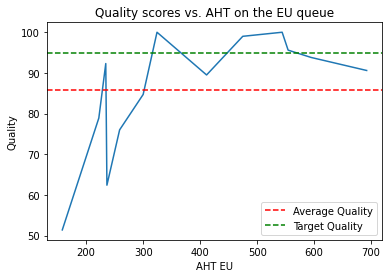

In [ ]:
sns.lineplot(data=data, y='Quality', x='AHT EU')
plt.title('Quality scores vs. AHT on the EU queue')
plt.axhline(y=quality_avg, linestyle='--', c='red', label='Average Quality')
plt.axhline(y=quality_target, linestyle='--', c='green', label='Target Quality')
plt.legend()

####Quality vs. AHT on the US market

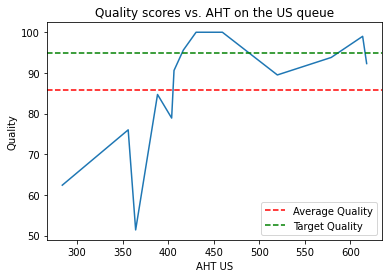

In [ ]:
sns.lineplot(data=data, y='Quality', x='AHT US')
plt.title('Quality scores vs. AHT on the US queue')
plt.axhline(y=quality_avg, linestyle='--', c='red', label='Average Quality')
plt.axhline(y=quality_target, linestyle='--', c='green', label='Target Quality')
plt.legend()

Relationship between AHT and quality is clearly visible on the both markets. With much more sorted data samples it is posibble that this relationship would be linear. 

##Number of cases analysis

####Average number of worked cases in the whole team

In [ ]:
print('Average number of worked cases in the team: {}'.format(np.round(num_cases_avg, 2)))

Average number of worked cases in the team: 726.69


###Number of cases worked by individual teammate in corespond to the mean of the whole team

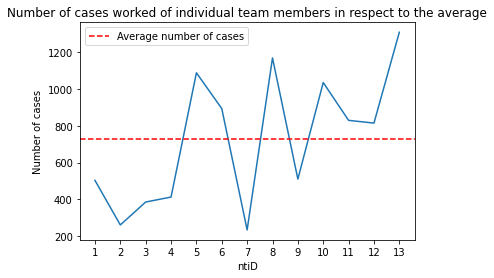

In [ ]:
sns.lineplot(data=data,y='Number of cases', x='ntiD')
plt.title('Number of cases worked of individual team members in respect to the average')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.axhline(y=num_cases_avg, linestyle='--', c='red', label='Average number of cases')
plt.legend()

Plotting number of cases worked shows as really interesting results. 
> Teammate with **ntiD 7** worked really low amount of cases. Comparing it with a low quality scores it is possible that ntiD 7 teammate is a new addition to our team, or is working not on a full time. 

> Teammates with **ntid 1 , 2, 4** have pretty good quality score (3 of them in top 5), but high AHT value. Adding to it the low amount of cases worked by them, we can spot typical behaviour (new teammates or teammates that focus intensively on the quality of their work). 

> Teammate with **ntid 9** is also interesting case, lowest/highest AHT values depeneding on market, above average quality, low amount of cases. Seems like a teammate with a lot of potential. Maybe some aditionally amount of training, clearing procedures (us market) would help teammate with ntid 9 to achieve lower values AHT on US market.     

> Teammates with **ntid 5, 8, 13** with lowest quality, lowest aht and above avg amount of cases worked have definetly one of the highest impact on the results of the whole team (if we'd calculate mean values in respect to the all cases worked by the team). 

> Teammates with **ntid 6, 10** with highest aht quality and above average number of cases worked would have large impact on the aht, if we'd calculate the aht values in respect to all cases worked by the team. 

> Teammates with **ntid 10** has good quality scores, large amount of cases worked, but one of the highest aht. Large amount of cases worked with correlation to the low aht suggest more than other teammates worked hours. Maybe teammate is overworked? 

> Teammate with **ntid 3** has below average aht scores on both markets and has in top 5 results considering the quality. 




####Teammates who worked the largest volumen of cases

In [ ]:
data[['Number of cases', 'ntiD']].nlargest(5, columns='Number of cases')

,Number of cases,ntiD
12,1310,13
7,1170,8
4,1089,5
9,1036,10
5,894,6


####Teammates who worked the smallest volumen of cases

In [ ]:
data[['Number of cases', 'ntiD']].nsmallest(5, columns='Number of cases')

,Number of cases,ntiD
6,233,7
1,260,2
2,385,3
3,412,4
0,503,1


###Quality vs. Number of cases

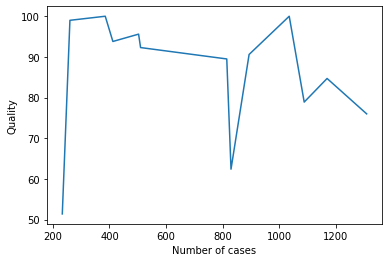

In [ ]:
sns.lineplot(data=data, x='Number of cases', y='Quality')

###Number of cases vs. AHT

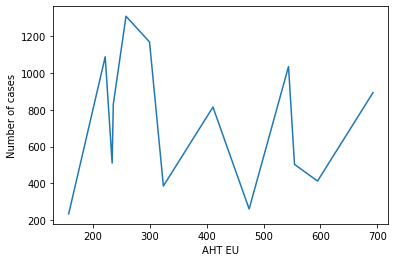

In [ ]:
sns.lineplot(data=data, y='Number of cases', x='AHT EU')

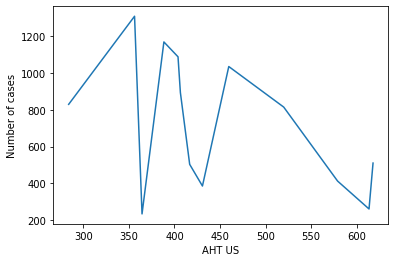

In [ ]:
sns.lineplot(data=data, y='Number of cases', x='AHT US')

##Correlations between the features

Earlier we've seen the correlation between high AHT and high quality, and low AHT and low quality. Let's take a look at AHT, quality, number of cases worked and all teammates on the one plot. 

Text(0.5, 1.0, 'Correlations on the EU market')

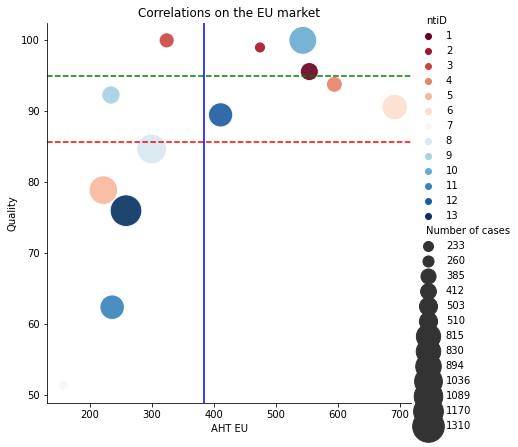

In [ ]:
sns.relplot(x="AHT EU", y="Quality", hue="ntiD", size="Number of cases",
            sizes=(100, 1000), alpha=.9, palette="RdBu",
            height=6, data=data, legend='full')
plt.axhline(y=quality_avg, linestyle='--', c='red', label='Average Quality')
plt.axhline(y=quality_target, linestyle='--', c='green', label='Target Quality')
plt.axvline(x=aht_eu_avg, linestyle='-', c='blue', label='Average AHT EU')
plt.title('Correlations on the EU market')

Text(0.5, 1.0, 'Correlations on the US market')

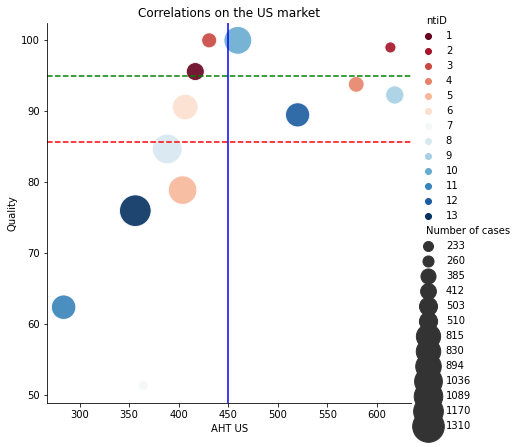

In [ ]:
sns.relplot(x="AHT US", y="Quality", hue="ntiD", size="Number of cases",
            sizes=(100, 1000), alpha=.9, palette="RdBu",
            height=6, data=data, legend='full')
plt.axhline(y=quality_avg, linestyle='--', c='red', label='Average Quality')
plt.axhline(y=quality_target, linestyle='--', c='green', label='Target Quality')
plt.axvline(x=aht_us_avg, linestyle='-', c='blue', label='Average AHT US')
plt.title('Correlations on the US market')

With above replots on the both markets we can see better what are the ntid's of teammates we need to give more support. 

> Teammate's with ntid's: 5, 11, 13  need to work on quality more intensively.

> Teammate with ntid 7 needs more quality traning. 

>  The same issue we have with a results of a teammate with ntid 8, but teammate with ntid 8 has Quality results almost on the average of the whole team, so only small corrections are probably necessary here. 

> Teammate's in the mid range of quality target and the average - ntid's 4, 9, 12, and 6 (for the EU market) - don't have much issues with quality, but they need to take a closer look at their's working patterns and efficiency, to achieve better results. 

> Teammate's with ntid 1, 3, 10 are achieving target goals and are near the average of the aht of the whole team. but have a little higher aht on the EU. 

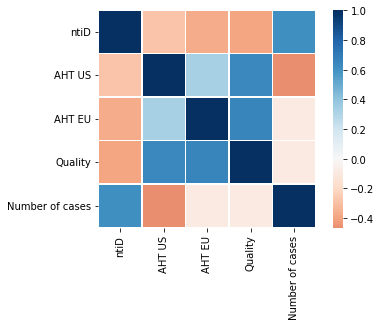

In [ ]:
cr = data.corr()
sns.heatmap(cr,cmap='RdBu', center=0,
            square=True, linewidths=.5)


With a correlation map above we see tha AHT EU/US is strongly positively correlated with quality (blue squares). 

---
---

##Identifying teammates with the greatest impact on the AHT values

Teammates with the greates impact on the AHT values are further from the AHT are the teammates with the most extreme values of the AHT in respect to the whole team. 

> Lowest AHT EU: 158.1, ntiD - 7

> Highest AHT EU: 692.2 , ntiD - 6

> Lowest AHT US: 283.9, ntiD - 11

> Highest AHT US: 617.9 , ntiD - 9



##Identifying teammates who need to work intesively on the Quality goal - 95%

Teammates who need to work instesibely on the Quality goal - which is 95% - are the teammates with lowest quality scores in the whole team. 



In [ ]:
data[['Quality', 'ntiD']].nsmallest(5, columns='Quality')

,Quality,ntiD
6,51.4,7
10,62.4,11
12,76.0,13
4,78.9,5
7,84.7,8


##Identifying which KPI's should be work on first

As seen in the correlation plot the only 4 teammates achieve the **QUALITY TARGET** - 95%. 4 of our teammates are in the 'mid range' quality level (between target and average). And all the rest (5 teammates) are below average of the whole team. 
> First KPI which our team needs to work on is **Quality**. 

On the second place our team needs to work on **AHT** levels. 5-6 teammates don't reach the average of the whole team. 6 of our teammates are working really fast, but in the cost of quality - which it shouldn't be in order. 



##Identying which behaviors can cause low AHT results

Our analysis lead to the strong correlations between AHT results and quality scores. In 2-3 cases (ntid 4, 9, 12 US/ntid) 4,6, EU) low ATH results correlates with above average quality. And with 1-3 cases (ntid 2 US/ ntid 2, 10, 11 EU) low AHT results correlates with target hitting and above quality. 

It is also good to point out small relationship between above average amount of cases worked and low aht results (ntid's 4, 9, 2, 1 depending on the market), which could lead to conclusion of not estblished workflow already - new teammates, new market, rarely working market. 

Also we could think that the oder reason behind low AHT results would be high volume of cases worked (suggests overwork) - ntid 10. 

With above we can be lead to a conclusion, that the main 3 reason of the low AHT results are: 
1. Focussing work efforts on the quality, without taking into consideration AHT results. 
2. Working on new market/being new teammate. 
3. Working rarely on some markets. 


##How to improve whole team results?

Main problem of the team is reaching Quality Target. Our efforts should focus in the first place on the Quality. 

> How to improve Quality? 

Various actions could be taken in this kind of situation, but first it is a good practice, to talk with a team, to hear what all and individual teammates, have an issue with, which makes them hard to reaching the QUALITY target. It seems like the most efficient way to do this, is to organize a team meeting, when everyone will be asked '**What she/he thinks what is the main obstacle in reaching the quality target**'. 

Brainstorming with a team would also be beneficial for the rising team spirit, and showing the team, that their voice matters. 

Creating notes from the meeting about main team issues, can help us to determine the most effective and tailored for the team members solution. 

 * What actions could we take to improve Quality? 

    * **Organize a survey**, in which teammates could share what procedures are the ones that are not perfectly clear for them. After receiving the survey results, TL is forwarding questions to the SME, and coming back to the team to team to talk about the procedures on team metting.
    * **Create a file with FAQ and answers about procedures in the team** and save it for the easy and accesible team use - on the team channel on teams. 
    *   Organize **Side-By-Side sessions** with teammates with highest quality and highest AHT results (inside the team - to encourage the connections between teammates and one-team approach). One teammate is solving cases, the other is watching. And after some time, they are switching the roles. 
    
After achieving better evaluations results, the team can focus on improving AHT.

> How to improve AHT?

Generally AHT should naturally be 'better', when the amount of cases worked by the individual teammates increase. But low aht results are not always the case, and sometimes some workflow tuning is required. 

Almost half of the team (results of quality are above average), are dealing with troubles in achieving better AHT results. Besides asking team members about what could've help them in achieving lower AHT results. What can we do to improve this?

> What actions could we take to improve AHT results?
  
  *  **Tips from the fastest**, we can organize individual sessions with teammates, who have good aht and quality scores. 
  * **Work with a workflow**, create step-by-step workflow chart for teammates to follow easily and learn the most efficient work patterns. 
  * **Help from the tools**, there are couple of Windows integrated software which teammates can use for repetitive tasks - showing theam such a tools could be beneficial for the aht results. 

  